In [1]:
import pandas as pd
movies = pd.read_csv('movies.dat', delimiter='::', header=None)
movies.columns = ['MovieID', 'Title', 'Genres']
users = pd.read_csv('users.dat', delimiter='::', header=None)
users.columns = ['UserID','Gender','Age','Occupation','Zip-code']
ratings = pd.read_csv('ratings.dat', delimiter='::')
movies['Year'] = pd.to_numeric(movies['Title'].str[-5:-1])

/Users/lukasz/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app
/Users/lukasz/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/lukasz/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


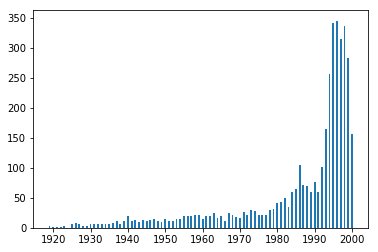

In [8]:
import matplotlib.pyplot as plt
movies_year = movies.groupby('Year').size().reset_index()
plt.bar(movies_year['Year'], movies_year[0], 0.5)
plt.show()
# ile filmów powstało w poszczególnych latach

  Gender     0
0      F  1709
1      M  4331


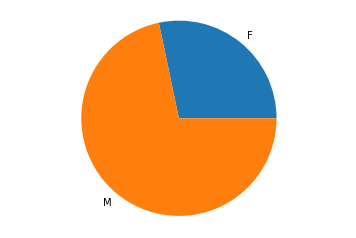

In [17]:
users_gender = users.groupby('Gender').size().reset_index()
print(users_gender)
plt.pie(users_gender[0], labels=users_gender['Gender'])
plt.axis('equal')
plt.show()
# liczba kobiet vs liczba mężczyzn

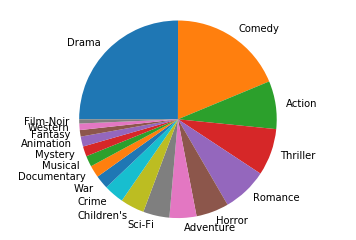

In [27]:
import numpy as np
movies_genres = pd.Series(np.concatenate(movies['Genres'].str.split('|'))).value_counts().to_frame().reset_index()
plt.pie(movies_genres[0], labels=movies_genres['index'], counterclock=False, startangle=180)
plt.axis('equal')
plt.show()

In [45]:
users_ratings = pd.merge(users, ratings, on='UserID')
#users_ratings = pd.crosstab(users_ratings['Gender'], users_ratings['Rating'])
x1 =users_ratings[users_ratings['Gender'] == 'F'].groupby('Rating').apply(np.size).reset_index()[0]

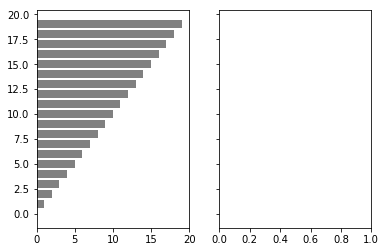

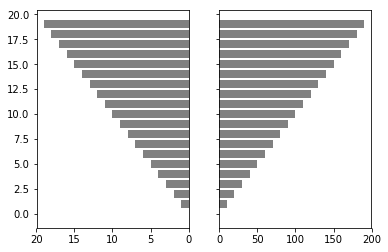

In [46]:
y = range(20)
x1 = range(20)
x2 = range(0, 200, 10)

fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, x1, align='center', color='gray')
axes[1].barh(y, x2, align='center', color='gray')
axes[0].invert_xaxis()
plt.show()